# Data discription

1. __FIRMCOST__ - The measure of the firm’s risk management cost effectiveness, defined as total property and casualty premiums and uninsured losses as a percentage of total assets.

1. __ASSUME__ - Per occurrence retention amount as a percentage of total assets.

1. __SIZELOG__ - Logarithm of total assets.

1. __INDCOST__ - A measure of the firm’s industry risk.

1. __CENTRAL__ - A measure of the importance of the local managers in choosing the amount of risk to be retained.

1. __SOPH__ - A measure of the degree of importance in using analytical tools.

In [3]:
import pandas as pd
import numpy as np

# Display data statistics

In [4]:
def corr(df, col_names):
    '''
        compute correlation matrix
    '''
    rs = np.random.RandomState(0)
    df = pd.DataFrame(rs.rand(len(col_names), len(col_names)), columns=col_names)
    corr = df.corr()
    corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
    
    return corr

In [5]:
# define path to RiskSurvey data
PATH_TO_DATA = 'regression-data/data-actuarial/RiskSurvey.csv'

# creating dataframe
df = pd.read_csv(PATH_TO_DATA)
df = df.drop('CAP', axis=1)

In [6]:
# display data
df.head()

,FIRMCOST,ASSUME,SIZELOG,INDCOST,CENTRAL,SOPH
0,3.29,0.29,9.55,0.32,1,25
1,9.31,0.89,8.04,0.33,2,24
2,4.07,1.67,7.90,0.34,2,15
3,6.94,1.21,8.10,0.34,1,16
4,5.35,0.28,7.74,0.09,3,18


In [7]:
# data description
df.describe()

,FIRMCOST,ASSUME,SIZELOG,INDCOST,CENTRAL,SOPH
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,10.973288,2.573562,8.331918,0.418356,2.246575,21.191781
std,16.158611,8.444978,0.963378,0.216243,1.255884,5.303713
min,0.200000,0.000000,5.270000,0.090000,1.000000,5.000000
25%,3.510000,0.240000,7.650000,0.330000,1.000000,18.000000
50%,6.080000,0.510000,8.270000,0.340000,2.000000,23.000000
75%,12.710000,1.670000,8.950000,0.500000,3.000000,25.000000
max,97.550003,61.820000,10.600000,1.220000,5.000000,31.000000


# Show correlation between predictors

In [8]:
# build correlation matrix of predictors
corr(df.loc[:, 'FIRMCOST':'SOPH'], ['FIRMCOST', 'ASSUME', 'SIZELOG', 'INDCOST', 'CENTRAL', 'SOPH'])

,FIRMCOST,ASSUME,SIZELOG,INDCOST,CENTRAL,SOPH
FIRMCOST,1,0.66,0.52,-0.3,0.0099,0.82
ASSUME,0.66,1,0.33,-0.7,-0.11,0.69
SIZELOG,0.52,0.33,1,0.16,0.6,0.052
INDCOST,-0.3,-0.7,0.16,1,0.37,-0.53
CENTRAL,0.0099,-0.11,0.6,0.37,1,-0.54
SOPH,0.82,0.69,0.052,-0.53,-0.54,1


# Fit linear model

In [9]:
def fit_linear_model(df):
    input_matrix = df.copy()
    input_matrix['INTERCEPT'] = pd.Series(1, index=input_matrix.index)
    
    X = input_matrix.loc[:, 'ASSUME':'INTERCEPT'].values
    y = input_matrix['FIRMCOST'].values
    
    coefs = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), 
                          X.transpose()), y)
    
    return coefs

# split dataset on train and test 60:40, due to low number of examples
X_train, X_test = df[:40], df[40:]
# compute coefficient for linear model
coefs = fit_linear_model(X_train)
coefs

array([ 1.65692943e-01, -2.06567267e+00,  3.21444851e+01, -2.46195547e-02,
       -1.91112242e-01,  1.82712436e+01])

# Get predictions

In [10]:
# get results on test dataset
def linear_model_predict(coefficients, to_predict):
    pred = to_predict.apply(
        lambda x: sum(list(map(
            lambda k: k[0]*k[1], zip(np.append(x.values[1:], 1), coefficients))))
        , axis=1)
    
    return pred

# comparison
y_predictions = linear_model_predict(coefs, X_test)
comp = y_predictions.to_frame(name='predictions')
comp['actual'] = X_test['FIRMCOST']
comp['residual'] = comp['actual'] - comp['predictions']
comp

,predictions,actual,residual
40,7.160693,2.160000,-5.000693
41,4.355577,0.360000,-3.995577
42,5.532433,7.830000,2.297567
43,9.434665,5.090000,-4.344665
44,-4.519594,0.200000,4.719594
45,7.408182,8.850000,1.441818
46,9.943768,0.760000,-9.183768
47,5.365878,5.710000,0.344122
48,27.372334,17.530001,-9.842334
49,5.918854,14.000000,8.081146


# Residual plot

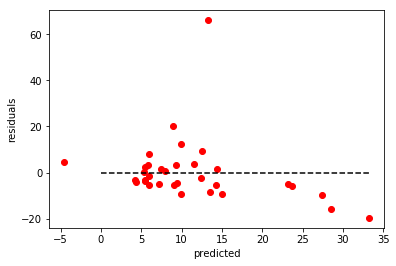

In [11]:
import matplotlib.pyplot as plt

plt.plot(comp['predictions'], comp['residual'], 'ro', np.linspace(0, max(comp['predictions']), len(comp)), [0]*len(comp), '--k')
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.show()

There is no visible pattern but we have several outliers.

/home/daniil/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


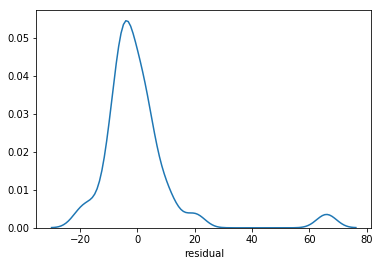

In [12]:
# density plot
import seaborn as sns
sns.distplot(comp['residual'], hist=False)

# Compute $R^2$

In [13]:
def r_squared(actual, predicted):
    mean = sum(actual)/len(actual)
    RSS = sum(list(map(lambda x: (x[0] - x[1])**2, zip(predicted, actual))))
    TSS = sum(list(map(lambda x: (x - mean)**2, actual)))
    
    return 1 - RSS/TSS

score = r_squared(comp['actual'].tolist(), comp['predictions'].tolist())
score

0.016972853550193512

R^2 of the model equals to **0.016**, so the model fits a bit better than a horizontal hyperplane. Due to high correlation between predictors and rank of X is less than p + 1 (5 < 6), so we can assume that ridge regression can be a better choise for our problem.

# Estimating covariance matrix of $\tilde{β}$

In [14]:
# Variance of β
score = r_squared(comp['actual'].tolist(), comp['predictions'].tolist())
X = X_train.copy()
X['INTERCEPT'] = pd.Series(1, index=X.index)
y = X['FIRMCOST'].values
X = X.loc[:, 'ASSUME':'INTERCEPT'].values
H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.transpose(), X))), X.transpose())
# estimating σ^2
sigma2 = np.dot(np.dot(y.transpose(), (np.identity(H.shape[0]) - H)), y)/(X.shape[0] - X.shape[1])
var = np.dot(np.linalg.inv(np.dot(X.transpose(), X)), sigma2)
pd.DataFrame(var)

,0,1,2,3,4,5
0,1.264688,0.530214,-2.308232,0.044273,-0.052752,-4.163613
1,0.530214,12.687781,0.411645,1.493031,0.760806,-125.394404
2,-2.308232,0.411645,150.220666,5.600334,-1.571776,-41.155763
3,0.044273,1.493031,5.600334,6.343226,-0.295370,-22.117418
4,-0.052752,0.760806,-1.571776,-0.295370,0.333641,-11.916516
5,-4.163613,-125.394404,-41.155763,-22.117418,-11.916516,1367.329784


# Ridge regression

In [15]:
from sklearn.preprocessing import StandardScaler

def fit_ridge_regression(x, y, alpha=1):
    X = x.copy()
    X = np.array([np.append(step, 1) for step in X])

    return np.dot(np.dot(np.linalg.inv((np.dot(X.transpose(), X) + 
                  np.dot(alpha, np.identity(X.shape[1])))), 
                                            X.transpose()), y)

def ridge_reg_predict(coefficients, to_predict):
    pred = to_predict.apply(
        lambda x: sum(list(map(
            lambda k: k[0]*k[1], zip(np.append(x.values, 1), coefficients))))
        , axis=1)
    
    return pred

# Standarize data
scaler = StandardScaler()
X_train_rg, y_train = X_train.loc[:, 'ASSUME':'SOPH'].values, X_train['FIRMCOST'].values
X_train_std = scaler.fit_transform(X_train_rg)

# getting most sutable alpha
alphas, output = np.linspace(0, 10, 1000), []
for alpha in alphas:
    ridge_coefs = fit_ridge_regression(X_train_std, y_train, alpha=alpha)
    ridge_pred = ridge_reg_predict(ridge_coefs, pd.DataFrame(X_train_std))
    output.append(r_squared(y_train, ridge_pred))

best_alpha = alphas[output.index(max(output))]
ridge_coefs = fit_ridge_regression(X_train_std, y_train, alpha=best_alpha)
ridge_pred = ridge_reg_predict(ridge_coefs, pd.DataFrame(scaler.transform(X_test.loc[:, 'ASSUME':'SOPH'].values)))
y_test = X_test['FIRMCOST'].values
r_squared(y_test, ridge_pred)

0.016972853550185962

$R^2$ score of ridge regression is the same as $R^2$ of pure linear model. Due to most sutable alpha, which is __0.0__. So, ridge regression doesn't improve perfomance.

# Applying Principal Component Analysis to reduce dimension of the space

In [16]:
import plotly.plotly as py

scaler = StandardScaler()
x_train, y_train = X_train.loc[:, 'ASSUME':'SOPH'].values, X_train['FIRMCOST'].values
x_test, y_test = X_test.loc[:, 'ASSUME':'SOPH'].values, X_test['FIRMCOST'].values
scaler.fit(x_train)

# rescale our data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# getting mean vector
mean_vec = np.mean(x_train, axis=0)
# build covariance matrix
cov_mat = np.dot((x_train - mean_vec).transpose(), (x_train - mean_vec))/(x_train.shape[0] - 1)
# getting eigen values and corresponding vectors
eigen_values, eigen_vecs = np.linalg.eig(cov_mat)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vecs[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# compute variance explained by each principal component
var_exp = [val/sum(eigen_values)*100 for val in sorted(eigen_values, reverse=True)]
# cumulative sum of the elements
cum_var_exp = np.cumsum(var_exp)
# creat plot
trace1 = dict(
    type='bar',
    x=['PC{}'.format(i) for i in range(1, len(eigen_values) + 1)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC{}'.format(i) for i in range(1, len(eigen_values) + 1)],
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dratarov/0 or inside your plot.ly account where it is named 'selecting-principal-components'


# Projection onto the new Feature Space

In [24]:
# reducing the 5-dimensional feature space to a 4-dimensional feature subspace
# constructing of the projection matrix
def choose_n_comp(N):
    return np.hstack((eigen_pairs[i][1].reshape(len(eigen_values),1) for i in range(N)))

num_of_comp = 4
matrix_w = choose_n_comp(num_of_comp)
# transform our samples
x_train_tr = np.dot(x_train, matrix_w)
x_test_tr = np.dot(x_test, matrix_w)

# train linear model
coefs = fit_ridge_regression(x_train_tr, y_train, alpha=0)
pred = ridge_reg_predict(coefs, pd.DataFrame(x_test_tr))
r_squared(y_test, pred)

/home/daniil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



-0.24806993048618198

__1__ component, __36%__ of variance explained, $R^2$ on linear model = __0.027__ <br>
__2__ components, __60%__ of variance explained, $R^2$ on linear model = __-1.190__ <br>
__3__ components, __76%__ of variance explained, $R^2$ on linear model = __-0.091__ <br>
__4__ components, __90%__ of variance explained, $R^2$ on linear model = __-0.248__ <br>
__5__ components, __100%__ of variance explained, $R^2$ on linear model = __0.0169__ <br>

So, optimal number of components is still 5. Better performace result with only one component we can consider as luck due to lack of samples in our dataset and impossibility to obtain balanced decision. 

# Variable Selection
### CRITERION-BASED PROCEDURE (Adjusted $R^2$)

In [56]:
import itertools

# adjusted r2
def adj_r_squared(actual, predicted, exp_var):
    r2 = r_squared(actual, predicted)
    return 1 - (1 - r2)*(len(actual) - 1)/(len(actual) - exp_var - 1)

combinations = []

#Looping over k = 1 to k = 5 components in X
for k in range(2, x_train.shape[1] + 1):
    #Looping over all possible combinations
    for indices in itertools.combinations(range(len(x_train.transpose())), k):
        combo = np.array([x_train.transpose()[i] for i in indices]).transpose()
        reg_coefs = fit_ridge_regression(combo, y_train, alpha=0) 
        pred = ridge_reg_predict(reg_coefs, pd.DataFrame(np.array([x_test.transpose()[i] for i in indices]).transpose()))
        combinations.append([adj_r_squared(y_test, pred, k), indices])   

# sort combinations list by adjusted r2 in descending order
combinations = sorted(combinations, key=lambda x: x[0], reverse=True)
combinations

[[0.15736845008248512, (1, 3)],
 [0.13107789420863258, (1, 4)],
 [0.08440232852963192, (1, 3, 4)],
 [0.005256447227352745, (1, 2)],
 [-0.007745722688474066, (1, 2, 4)],
 [-0.02716435251750382, (1, 2, 3)],
 [-0.043712671980775, (1, 2, 3, 4)],
 [-0.08724039547125595, (0, 1, 2)],
 [-0.11427456702110295, (3, 4)],
 [-0.12351984229840496, (0, 1, 2, 4)],
 [-0.12465931938912012, (0, 1, 2, 3)],
 [-0.14968273946623256, (2, 3)],
 [-0.15524864967324192, (2, 4)],
 [-0.16506921060718693, (0, 1, 2, 3, 4)],
 [-0.1926115478503685, (2, 3, 4)],
 [-0.24696417611594135, (0, 2)],
 [-0.2816119797516208, (0, 1)],
 [-0.28567329009918163, (0, 2, 3)],
 [-0.3057600918280441, (0, 2, 4)],
 [-0.3205340505498979, (0, 1, 4)],
 [-0.33569006539354174, (0, 1, 3)],
 [-0.34885986079418907, (0, 2, 3, 4)],
 [-0.371973947569995, (0, 1, 3, 4)],
 [-0.5136209732785726, (0, 4)],
 [-0.5912135704717056, (0, 3, 4)],
 [-0.6474805992304404, (0, 3)]]

As we can see, best adjusted $R^2$ score we get when using __SIZELOG__ and __CENTRAL__ components.

In [71]:
best = combinations[0][1]
reg_coefs = fit_ridge_regression(np.array([x_train[:, i] for i in best]).transpose(), y_train, alpha=0) 
pred = ridge_reg_predict(reg_coefs, pd.DataFrame(np.array([x_test[:, i] for i in best]).transpose()))
r_squared(y_test, pred)

0.2100329219523298

$R^2$ score = __0.21__ for  __SIZELOG__ and __CENTRAL__ features.

# Perform F-test 

In [83]:
def f_test(full, reduced, actual, dff, dfr):
    SSE_F = sum([(yi - yi_pred)**2 for yi, yi_pred in zip(actual, full)])
    SSE_R = sum([(yi - yi_pred)**2 for yi, yi_pred in zip(actual, reduced)])
    F_stat = ((SSE_R - SSE_F)/(dfr - dff))/(SSE_F/dff)

    return F_stat

def p_value()
# F-test between model with all 5 features and model with 2 features 
dff, dfr = len(comp['actual'].values) - 5 - 1, len(comp['actual'].values) - 2 - 1
F_stat = f_test(comp['predictions'].values, pred, comp['actual'].values, dff, dfr)
F_stat

-1.7675408272236814

As far as we can see, we can't reject the null hypothesis. Which tell us that model with 2 components is better choise.

In [86]:
# F-test between model with 2 features and null hypothesis  
mean = sum(comp['actual'].values)/len(comp['actual'].values)
F_stat_null = f_test(pred, [mean]*40, comp['actual'].values, 37, 39)
F_stat_null

4.918697454735734

But here, comparing with table value, we reject null hypothesis and confirm that model with two components performs better.

In conclusion, we choose linear model with __SIZELOG__ and __CENTRAL__ features and formula __y = sizelog*(-2.45) + central*(-1.27) + 10.21__. $R^2$ is 0.21, which is not really good, but is the best choise among other linear models based on our research.